In [ ]:
import pandas as pd
a_df = pd.read_csv('Directory for the csv file')

# Visualization

In [107]:
import seaborn as sns

#### Speed graph

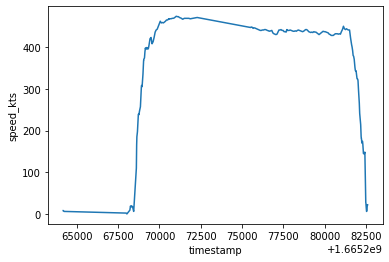

In [108]:
sns.lineplot(data=a_df, y="speed_kts", x="timestamp")

#### Altitude graph

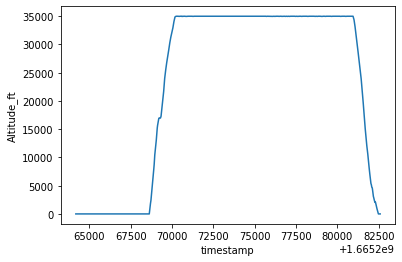

In [109]:
sns.lineplot(data=a_df, y="Altitude_ft", x="timestamp")

#### Flight profile graph

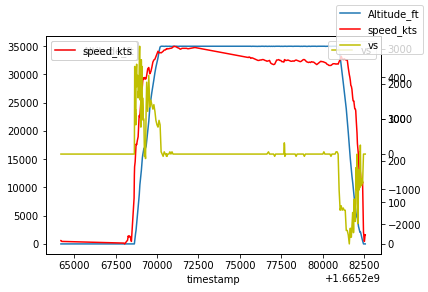

In [110]:
ax = a_df.plot(x="timestamp", y="Altitude_ft", legend=True)
ax2 = ax.twinx()
ax3 = ax.twinx()
a_df.plot(x="timestamp", y="speed_kts", ax=ax2, legend=True, color="r")
a_df.plot(x="timestamp", y="vs", ax=ax3, legend=True, color="y")
ax.figure.legend()

#### Flightpath trajectory

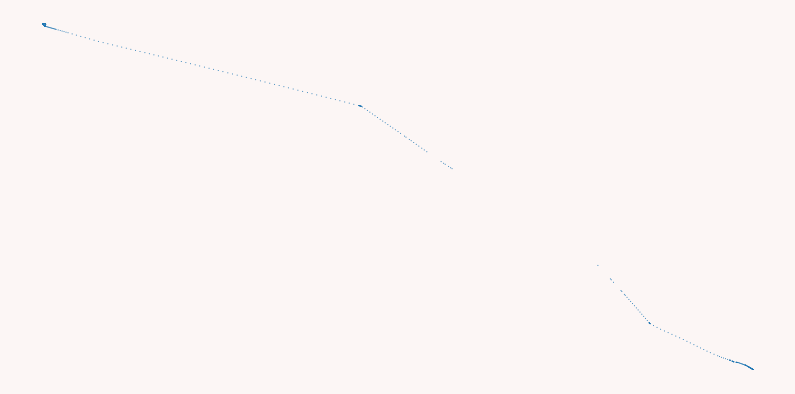

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(a_df['latitude'], a_df['longitude'], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.show()

Also you can see some missing infromation in between the flight which might be out of coverage area while the aircraft flying over the sea

# Takeoff 

Aircraft airborne at

In [138]:
takeoff = a_df[(a_df["Altitude_ft"]!=0)]
takeoff.head(1)

,heading,latitude,longitude,squawk,timestamp,Altitude_ft,vs,speed_kts
28,121,25.240952,55.385845,577,1665268633,250,1280,181


# Ceiling altitude of flight

In [134]:
print(max(a_df["Altitude_ft"]),"ft")

35000 ft


# Cruising speed 

In [137]:
max_speed = max(a_df["speed_kts"])
mach = max_speed * 0.00149984
print(max_speed, " Knots")
print(mach, "mach")

474  Knots
0.7109241599999999 mach


# To find the total distance covered on this flight


In [ ]:
dst = []
for i in range(len(a_df["latitude"])):
  lat1 = a_df["latitude"][i]
  lon1 = a_df["longitude"][i]
  lat2 = a_df["latitude"][i+1] #Error is because of the missing information in between the flight
  lon2 = a_df["longitude"][i+1]
  coords_1 = [lat1, lon1]
  coords_2 = [lat2, lon2]
  a = geopy.distance.geodesic(coords_1, coords_2).km
  dst.append(a)

# Total distance covered on this flight

In [118]:
km = sum(dst)
print(km, 'kms')

3062.027950955782 kms


In nautical miles

In [119]:
nm = km * 0.539957
print(nm, 'nm')

1653.3634263142314 nm


# Top of climb and descent

In [120]:
TOC = a_df[(a_df["Altitude_ft"]==35000)]

In [ ]:
# TOC.head(5)

# TOC
Top of cruise point during the flight

In [122]:
TOC.head(1)

,heading,latitude,longitude,squawk,timestamp,Altitude_ft,vs,speed_kts
128,128,23.413055,57.787437,577,1665270242,35000,64,458


# TOD
Top of descent point during the flight

In [123]:
TOC.tail(1)

,heading,latitude,longitude,squawk,timestamp,Altitude_ft,vs,speed_kts
261,144,11.403436,76.779114,577,1665280944,35000,0,431


# Final before Touchdown

In [139]:
landing = a_df[(a_df["Altitude_ft"]!=0)]
landing.tail(1)

,heading,latitude,longitude,squawk,timestamp,Altitude_ft,vs,speed_kts
386,266,9.835281,78.102272,577,1665282423,550,-832,148


# Fuel burnt(approx)

In [124]:
FB = km * 3.59  
print(FB, "Kgs (approx)")

10992.680343931257 Kgs (approx)


#Co2 emission 

In [126]:
c_km = km / 1.60934

In [127]:
Co2 = 22 * c_km
print(Co2,'(Kgs) Co2 emission for entire flight')

41858.53512683908 (Kgs) Co2 emission for entire flight


In [128]:
pkm = Co2 / 1000
print(pkm, '(kgs/km)')

41.85853512683908 (kgs/km)


# Cost of fuel

In [129]:
cost_fuel = FB * 114.396 #Value from mumbai

In [132]:
print("₹",cost_fuel, "(Aprrox)")

₹ 1257518.6606243602 (Aprrox)


# Approximate ticket cost with respect to the fuel alone

This may add up with all other expenses such as taxes, service cost, airport cost, handling and so on.

In [133]:
ticketcost = cost_fuel / 169 #80% occupency
print("₹",ticketcost,"Per passenger")

₹ 7440.938820262487 Per passenger
